观察2维高斯函数的$\Sigma$的意义

In [119]:
%matplotlib inline

In [120]:
import numpy as np
import matplotlib.pyplot as plt

令$\Sigma$为标准的$ \left[
  \begin{matrix}
   1.0 & 0.0 \\
   0.0 & 1.0 \\
  \end{matrix}
  \right]$

(-10, 10)

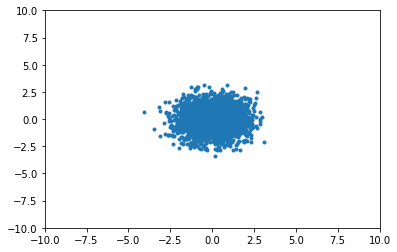

In [121]:
mu = [0.0, 0.0]
sigma = [[1.0, 0.0],[0.0, 1.0]]
X = np.random.multivariate_normal(mu, sigma, 3000)
plt.plot(X[:, 0],X[:,1], '.')
plt.xlim((-10,10))
plt.ylim((-10, 10))

令$\Sigma$为$ \left[
  \begin{matrix}
   10.0 & 0.0 \\
   0.0 & 1.0 \\
  \end{matrix}
  \right]$在横轴方向上$\sigma$增加

(-10, 10)

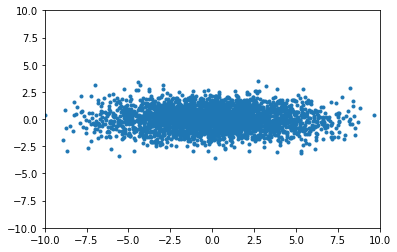

In [122]:
sigma = [[10.0, 0.0],[0.0, 1.0]]
X = np.random.multivariate_normal(mu, sigma, 3000)
plt.plot(X[:, 0],X[:,1], '.')
plt.xlim((-10,10))
plt.ylim((-10, 10))

令$\Sigma$旋转角度$\theta$<br>

$\Sigma =  \left[
  \begin{matrix}
   10.0 & 0.0 \\
   0.0 & 1.0 \\
  \end{matrix}
  \right] * \left[
  \begin{matrix}
   cos(\theta) & sin(\theta) \\
   -sin(\theta) & cos(\theta) \\
  \end{matrix}
  \right]$

[[ 8.66025404  5.        ]
 [-0.5         0.8660254 ]]


/Users/hobart/envs/learn/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


(-10, 10)

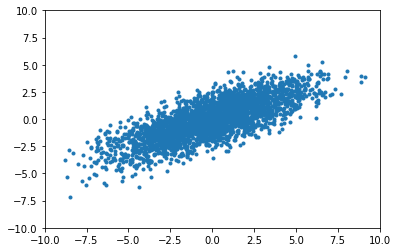

In [123]:
theta = np.pi/6
sigma = [[10.0, 0.0],[0.0, 1.0]]
rot = [[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]]
sigma = np.dot(sigma, rot)
print(sigma)
X = np.random.multivariate_normal(mu, sigma, 3000)
plt.plot(X[:, 0],X[:,1], '.')
plt.xlim((-10,10))
plt.ylim((-10,10))

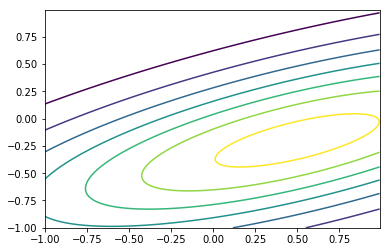

In [124]:
from scipy.stats import multivariate_normal
mu = [0.5, -0.2]
sigma = [[2.0, 0.7], [0.7, 0.5]]
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mu, sigma)
plt.contour(x, y, rv.pdf(pos))

(-10, 10)

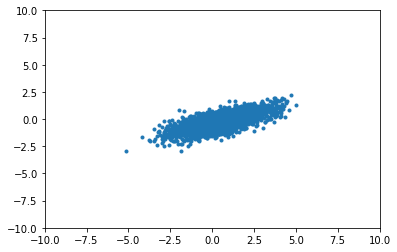

In [125]:
X = np.random.multivariate_normal(mu, sigma, 3000)
plt.plot(X[:, 0],X[:,1], '.')
plt.xlim((-10,10))
plt.ylim((-10,10))

In [126]:
def P(x, mu, sigma):
    m, n = x.shape
    s_ = np.linalg.inv(sigma)
    x_mu = x - mu
    numberator = np.dot(s_, x_mu.T)
    numerator = np.exp(-0.5 * np.dot(x_mu, numberator))
    denominator = np.linalg.det(sigma) ** 0.5
    denominator *= (2 * np.pi) ** (n/2)
    return np.diagonal(numerator/denominator)

In [127]:
mu = np.array([1.0, 2.0])
sigma = np.array([[2., .3], [.3, .5]])
from scipy.stats import multivariate_normal
x = np.array([[2,4],[3,5]])
print(multivariate_normal.pdf(x, mu, sigma))
print(P(x, mu, sigma))

[  3.02237982e-03   2.03646350e-05]
[  3.02237982e-03   2.03646350e-05]


In [128]:
x = np.array([[2,4]])
print(multivariate_normal.pdf(x, mu, sigma))
print(P(x, mu, sigma))

0.00302237982118
[ 0.00302238]


(40, 40)


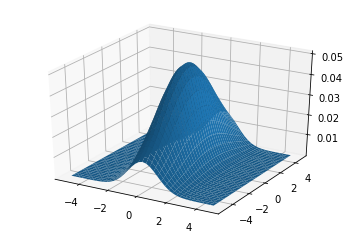

In [129]:
from mpl_toolkits.mplot3d import Axes3D
mu = [0.0, 0.0]
sigma = [[1.0, 0],[0.0, 10.0]]
px, py = np.mgrid[-5:5:0.25, -5:5:0.25]
pos = np.empty(px.shape +(2,))
pos[:,:,0] = px
pos[:,:,1] = py
prob = multivariate_normal.pdf(pos, mu, sigma)
print(prob.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(px, py, prob,rstride=1, cstride=1,)

<a list of 7 text.Text objects>

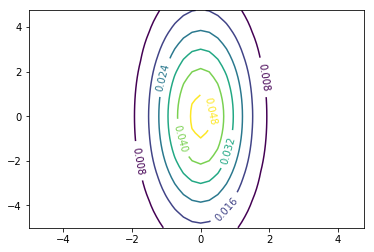

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
n_contour_lines = 6
cf = ax.contour(px, py, prob, n_contour_lines)
ax.clabel(cf, inline=True, fontsize=10)